In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
timeline=pd.read_json('challenger_timeline.json')

In [3]:
match_info=pd.read_json('CHALLENGER_2025-07-20_matches.json')

- 2명이 와드를 안 샀다?

In [192]:
map_position = {1 : 'TOP' , 2 : 'JUNGLE', 3 : 'MID', 4 : 'BOTTOM', 5 : 'UTIL',
                6 : 'TOP' , 7 : 'JUNGLE', 8 : 'MID', 9 : 'BOTTOM', 10 : 'UTIL'}
map_item = {3340 : '투명 와드', 3363 : '망원형 개조' , 3364 : '예언자의 렌즈'}
gameid = [];win = []; time = []; lane = []; is_red_tinker = []; is_blue_tinker = []; still_yellow_tinker=[]; level=[]


for i in range(len(timeline['info'])): #모든 게임에 대해
    matchid = timeline['metadata'][i]['matchId']
    games=timeline['info'][i]['frames'] 
    for game_num in range(len(games)): #필요한 파츠만 골라내서
        events=games[game_num]['events']
        for event in events: #한 게임 내 모든 이벤트에 대해
            is_yellow_tinker = True
            if event['type'] == 'ITEM_PURCHASED':
                if event['itemId'] == 3364:
                    gameid.append(matchid)
                    is_red_tinker.append(True)
                    is_blue_tinker.append(False)
                    still_yellow_tinker.append(False)
                    lane.append(map_position[event['participantId']])
                    time.append(int(event['timestamp']/1000/60))
                    level.append(games[game_num]['participantFrames'][str(event['participantId'])]['level'])
                    if (event['participantId'] / 5) <= 1: win.append(match_info['info'][i]['teams'][0]['win'])
                    else: win.append(match_info['info'][i]['teams'][1]['win'])
                
                elif event['itemId'] == 3363:
                    gameid.append(matchid)
                    is_red_tinker.append(False)
                    is_blue_tinker.append(True)
                    still_yellow_tinker.append(False)
                    lane.append(map_position[event['participantId']])
                    time.append(round(event['timestamp']/1000/60))
                    level.append(games[game_num]['participantFrames'][str(event['participantId'])]['level'])
                    if (event['participantId'] / 5) <= 1: win.append(match_info['info'][i]['teams'][0]['win'])
                    else: win.append(match_info['info'][i]['teams'][1]['win'])
    for user in range(10):
        if match_info.loc[i,'info']['participants'][user]['item6'] == 3340: #만약에 아예 안 바꾼 케이스가 존재한다면?
            gameid.append(matchid)
            if ((user + 1)/ 5) <= 1: win.append(match_info['info'][i]['teams'][0]['win'])
            else: win.append(match_info['info'][i]['teams'][1]['win'])
            time.append(int(event['timestamp']/1000/60))
            lane.append(map_position[user + 1])
            level.append(np.nan)
            is_red_tinker.append(False)
            is_blue_tinker.append(False)
            still_yellow_tinker.append(True)

In [188]:
games[game_num]['participantFrames'][str(event['participantId'])]['level']

nan

In [193]:
tinker=pd.DataFrame({'gameid' : gameid ,'win' : win,'time(m)' : time,'lane' : lane, 'level' : level,'change_red_tinker' : is_red_tinker, 'change_blue_tinker' : is_blue_tinker, 'still_yellow_tinker' : still_yellow_tinker})

In [195]:
tinker.dropna()

,gameid,win,time(m),lane,level,change_red_tinker,change_blue_tinker,still_yellow_tinker
0,KR_7721738512,False,3,UTIL,2.0,True,False,False
1,KR_7721738512,False,4,JUNGLE,4.0,True,False,False
2,KR_7721738512,True,4,JUNGLE,4.0,True,False,False
3,KR_7721738512,False,9,MID,8.0,True,False,False
4,KR_7721738512,True,11,UTIL,6.0,True,False,False
...,...,...,...,...,...,...,...,...
7203,KR_7721306888,False,7,UTIL,5.0,True,False,False
7204,KR_7721306888,False,13,BOTTOM,9.0,False,True,False
7205,KR_7721306888,False,13,MID,10.0,False,True,False
7206,KR_7721306888,True,16,BOTTOM,10.0,False,True,False


In [106]:
tinker['change_red_tinker']=tinker['change_red_tinker'].astype(int)
tinker['change_blue_tinker']=tinker['change_blue_tinker'].astype(int)
tinker['still_yellow_tinker']=tinker['still_yellow_tinker'].astype(int)

In [130]:
tinker[tinker['gameid'] == 'KR_7721838604'].sort_values('time(m)')

,gameid,win,time(m),lane,change_red_tinker,change_blue_tinker,still_yellow_tinker
3615,KR_7721838604,True,0,UTIL,1,0,0
6734,KR_7721838604,True,0,UTIL,1,0,0
6833,KR_7721838604,True,0,UTIL,1,0,0
6735,KR_7721838604,False,3,JUNGLE,1,0,0
6834,KR_7721838604,False,3,JUNGLE,1,0,0
3616,KR_7721838604,False,3,JUNGLE,1,0,0
3617,KR_7721838604,False,4,UTIL,1,0,0
6736,KR_7721838604,False,4,UTIL,1,0,0
6835,KR_7721838604,False,4,UTIL,1,0,0
6836,KR_7721838604,False,5,MID,1,0,0


In [141]:
tinker.groupby(['gameid','lane'])['win'].count()

gameid         lane  
KR_7720272386  BOTTOM    15
               JUNGLE    10
               MID       10
               TOP       10
               UTIL      10
                         ..
KR_7721838604  BOTTOM     6
               JUNGLE     6
               MID        6
               TOP        6
               UTIL       9
Name: win, Length: 1105, dtype: int64

<Axes: xlabel='time(m)', ylabel='Count'>

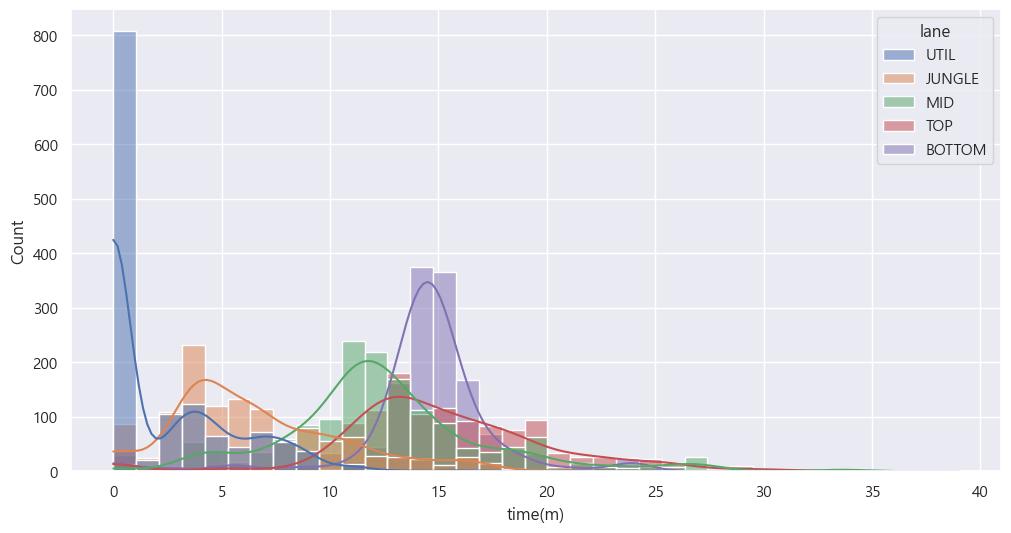

In [196]:
sns.histplot(x='time(m)',hue='lane',data=tinker.dropna(), kde=True)

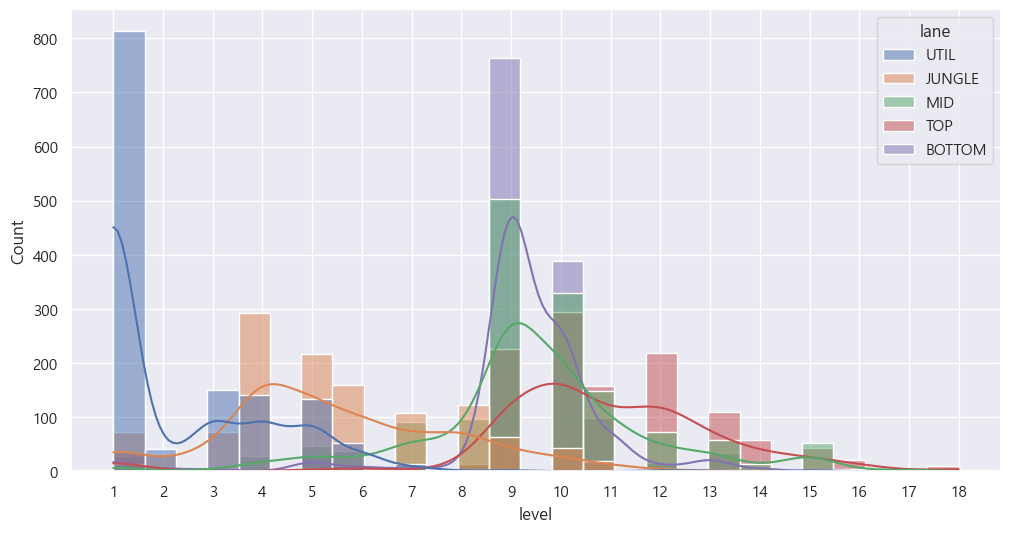

In [199]:
sns.histplot(x='level',hue='lane',data=tinker.dropna(), kde=True)
plt.xticks(range(1,19))
plt.show()

<Axes: xlabel='time(m)', ylabel='Count'>

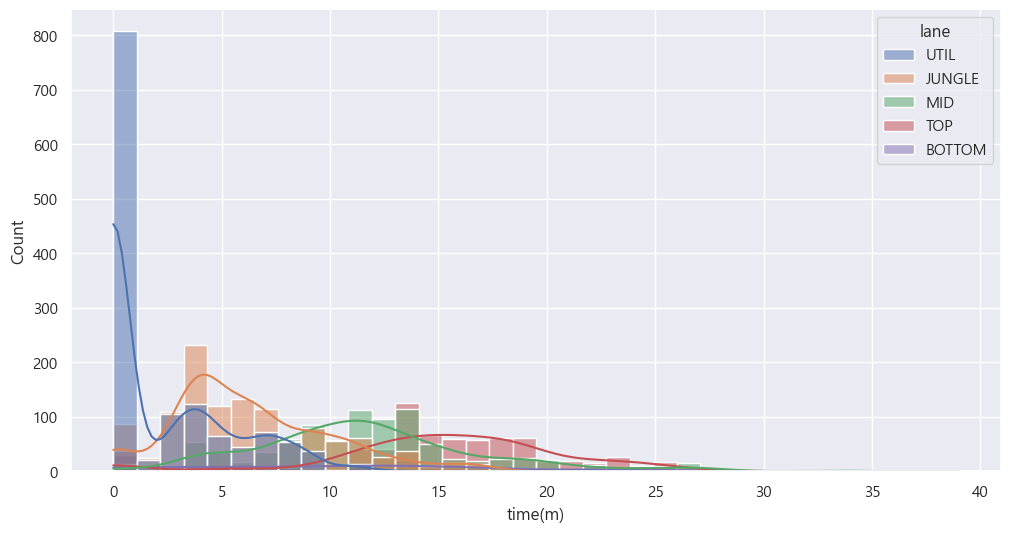

In [154]:
sns.histplot(x='time(m)',hue='lane',data=tinker[tinker['change_red_tinker']== True], kde=True)

<Axes: xlabel='time(m)', ylabel='Count'>

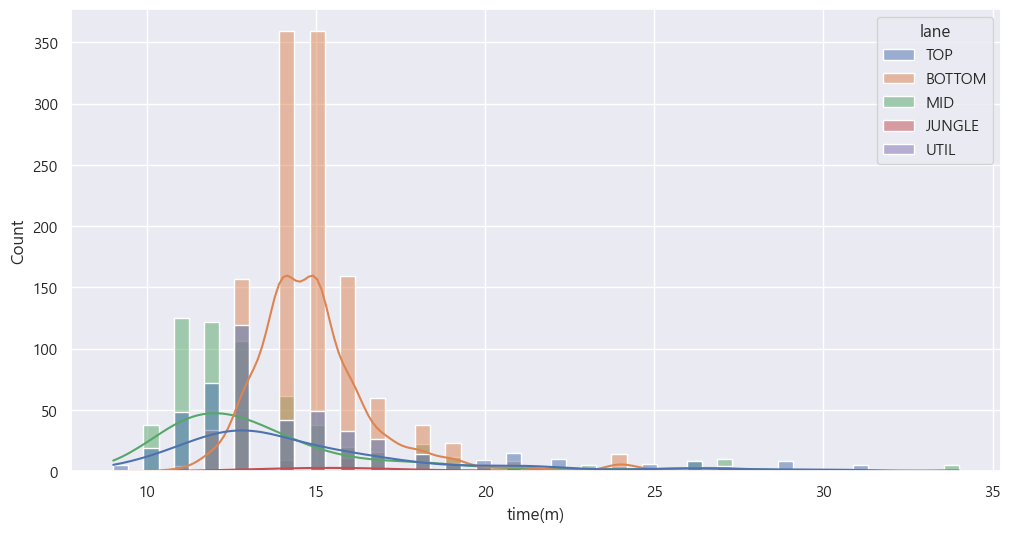

In [155]:
sns.histplot(x='time(m)',hue='lane',data=tinker[tinker['change_blue_tinker']== True], kde=True)

<Axes: xlabel='time(m)', ylabel='Count'>

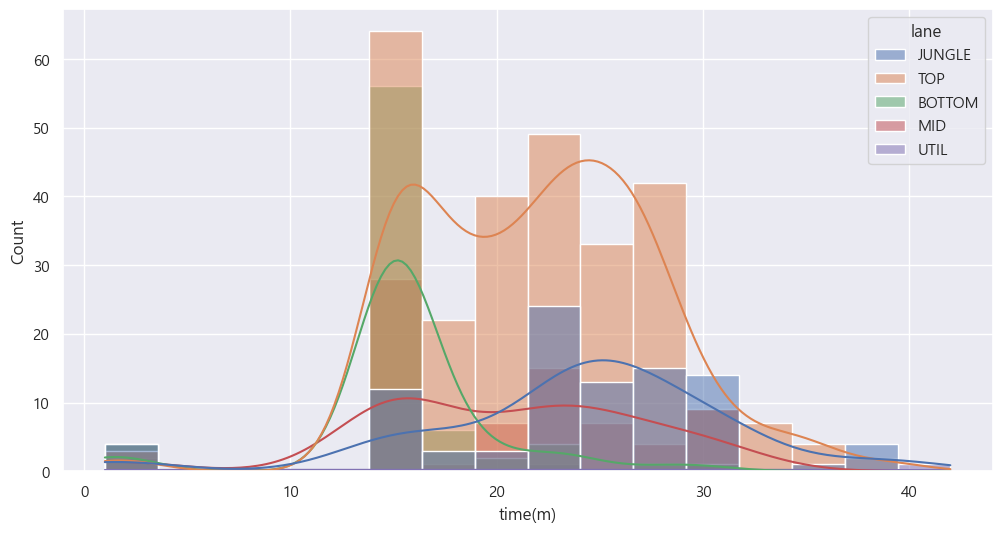

In [156]:
sns.histplot(x='time(m)',hue='lane',data=tinker[tinker['still_yellow_tinker']== True], kde=True)

In [169]:
temp=tinker[tinker['still_yellow_tinker']== True]
temp.groupby('win')['lane'].aggregate('count')

win
False    321
True     201
Name: lane, dtype: int64

In [93]:
tinker.groupby('lane')['change_red_tinker'].mean()

lane
BOTTOM    0.122724
JUNGLE    0.898851
MID       0.567807
TOP       0.478055
UTIL      0.992663
Name: change_red_tinker, dtype: float64

In [94]:
tinker.groupby('lane')['change_blue_tinker'].mean()

lane
BOTTOM    0.827377
JUNGLE    0.029885
MID       0.384664
TOP       0.336259
UTIL      0.003668
Name: change_blue_tinker, dtype: float64

In [95]:
tinker.groupby('lane')['still_yellow_tinker'].mean()

lane
BOTTOM    0.049899
JUNGLE    0.071264
MID       0.047529
TOP       0.185685
UTIL      0.003668
Name: still_yellow_tinker, dtype: float64